## MOBILENET ARCHITECTURE

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
import tensorflow
import tensorflow as tf
print(tf.__version__)

import keras
import keras.backend as K
from keras.models import Model
from keras.layers import Input, Dense, Conv2D, Conv3D, DepthwiseConv2D, SeparableConv2D, Conv3DTranspose
from keras.layers import Flatten, MaxPool2D, AvgPool2D, GlobalAvgPool2D, UpSampling2D, BatchNormalization
from keras.layers import Concatenate, Add, Dropout, ReLU, Lambda, Activation, LeakyReLU, PReLU


from time import time
import numpy as np

from keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')

2.18.0


In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train=ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,validation_split = 0.2)
train_data=train.flow_from_directory(directory = 'DATASET/TRAIN',target_size=(224,224),
                                     batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [16]:
test=ImageDataGenerator(rescale=1./255)
test_data=test.flow_from_directory(directory = 'DATASET/TEST',target_size=(224,224),
                                   batch_size=32,class_mode='categorical')

Found 2000 images belonging to 4 classes.


In [17]:
def mobilenet(input_shape, n_classes):
  
  def mobilenet_block(x, f, s=1):
    x = DepthwiseConv2D(3, strides=s, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    
    x = Conv2D(f, 1, strides=1, padding='same')(x)
    x = BatchNormalization()(x)
    x = ReLU()(x)
    return x
    
    
  input = Input(input_shape)

  x = Conv2D(32, 3, strides=2, padding='same')(input)
  x = BatchNormalization()(x)
  x = ReLU()(x)

  x = mobilenet_block(x, 64)
  x = mobilenet_block(x, 128, 2)
  x = mobilenet_block(x, 128)

  x = mobilenet_block(x, 256, 2)
  x = mobilenet_block(x, 256)

  x = mobilenet_block(x, 512, 2)
  for _ in range(5):
    x = mobilenet_block(x, 512)

  x = mobilenet_block(x, 1024, 2)
  x = mobilenet_block(x, 1024)
  
  x = GlobalAvgPool2D()(x)
  
  output = Dense(n_classes, activation='softmax')(x)
  
  model = Model(input, output)
  model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics=['accuracy',tensorflow.keras.metrics.Precision()])
  return model
     

input_shape = 224, 224, 3
n_classes = 4

K.clear_session()
model = mobilenet(input_shape, n_classes)
model.summary() 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 112, 112, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu (ReLU)                    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d                │ (None, 112, 112, 32)   │           320 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 112, 112, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_1 (ReLU)                  │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 112, 112, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_2 (ReLU)                  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_1              │ (None, 56, 56, 64)     │           640 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 56, 56, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_3 (ReLU)                  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_4 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ depthwise_conv2d_2              │ (None, 56, 56, 128)    │         1,280 │
│ (DepthwiseConv2D)               │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 56, 56, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ re_lu_5 (ReLU)                  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 56, 56, 128)    │        16,512 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 3,243,908 (12.37 MB)

 Trainable params: 3,222,020 (12.29 MB)

 Non-trainable params: 21,888 (85.50 KB)

In [18]:
model_path = "kerash_model.keras"

from keras.callbacks import ModelCheckpoint

M = ModelCheckpoint(model_path, monitor='accuracy', verbose=1, save_best_only=True)

In [19]:
epochs = 10
batch_size = 512

In [20]:
#### Fitting the model
history = model.fit(
           train_data, steps_per_epoch=train_data.samples // batch_size, 
           epochs=epochs, 
           validation_data=test_data,validation_steps=test_data.samples // batch_size,
           callbacks=[M])

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.2031 - loss: 1.6060 - precision: 0.1742     
Epoch 1: accuracy improved from -inf to 0.25000, saving model to kerash_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 38s 7s/step - accuracy: 0.2148 - loss: 1.6073 - precision: 0.1932 - val_accuracy: 0.2604 - val_loss: 1.3854 - val_precision: 0.0000e+00
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.3153 - loss: 1.3788 - precision: 0.3255    
Epoch 2: accuracy improved from 0.25000 to 0.30000, saving model to kerash_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.3115 - loss: 1.3764 - precision: 0.3494 - val_accuracy: 0.2708 - val_loss: 1.3842 - val_precision: 0.0000e+00
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.4601 - loss: 1.2038 - precision: 0.5704
Epoch 3: accuracy improved from 0.30000 to 0.45833, saving model to kerash_model.keras
3/3 ━━━━━━━━━━━━━━━━━━━━ 14s 6s/step - accuracy: 0.4596 - loss: 1.2078 - precision: 0.5778 - val_accuracy: 0

In [27]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'precision', 'val_accuracy', 'val_loss', 'val_precision'])

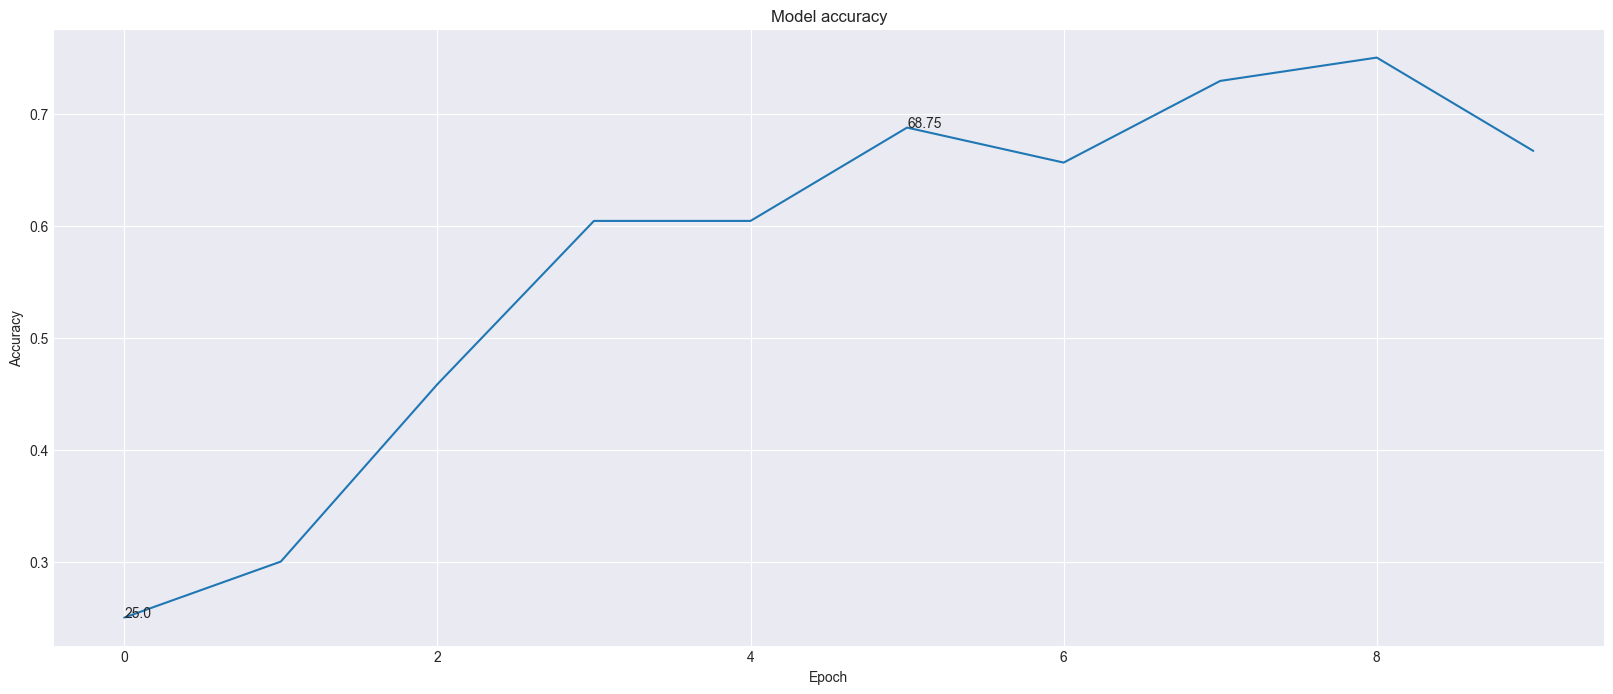

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(20, 8))
plt.plot(history.history['accuracy'])

for i in range(epochs):
    if i%5 == 0:
        plt.annotate(np.round(history.history['accuracy'][i]*100,2),xy=(i,history.history['accuracy'][i]))

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

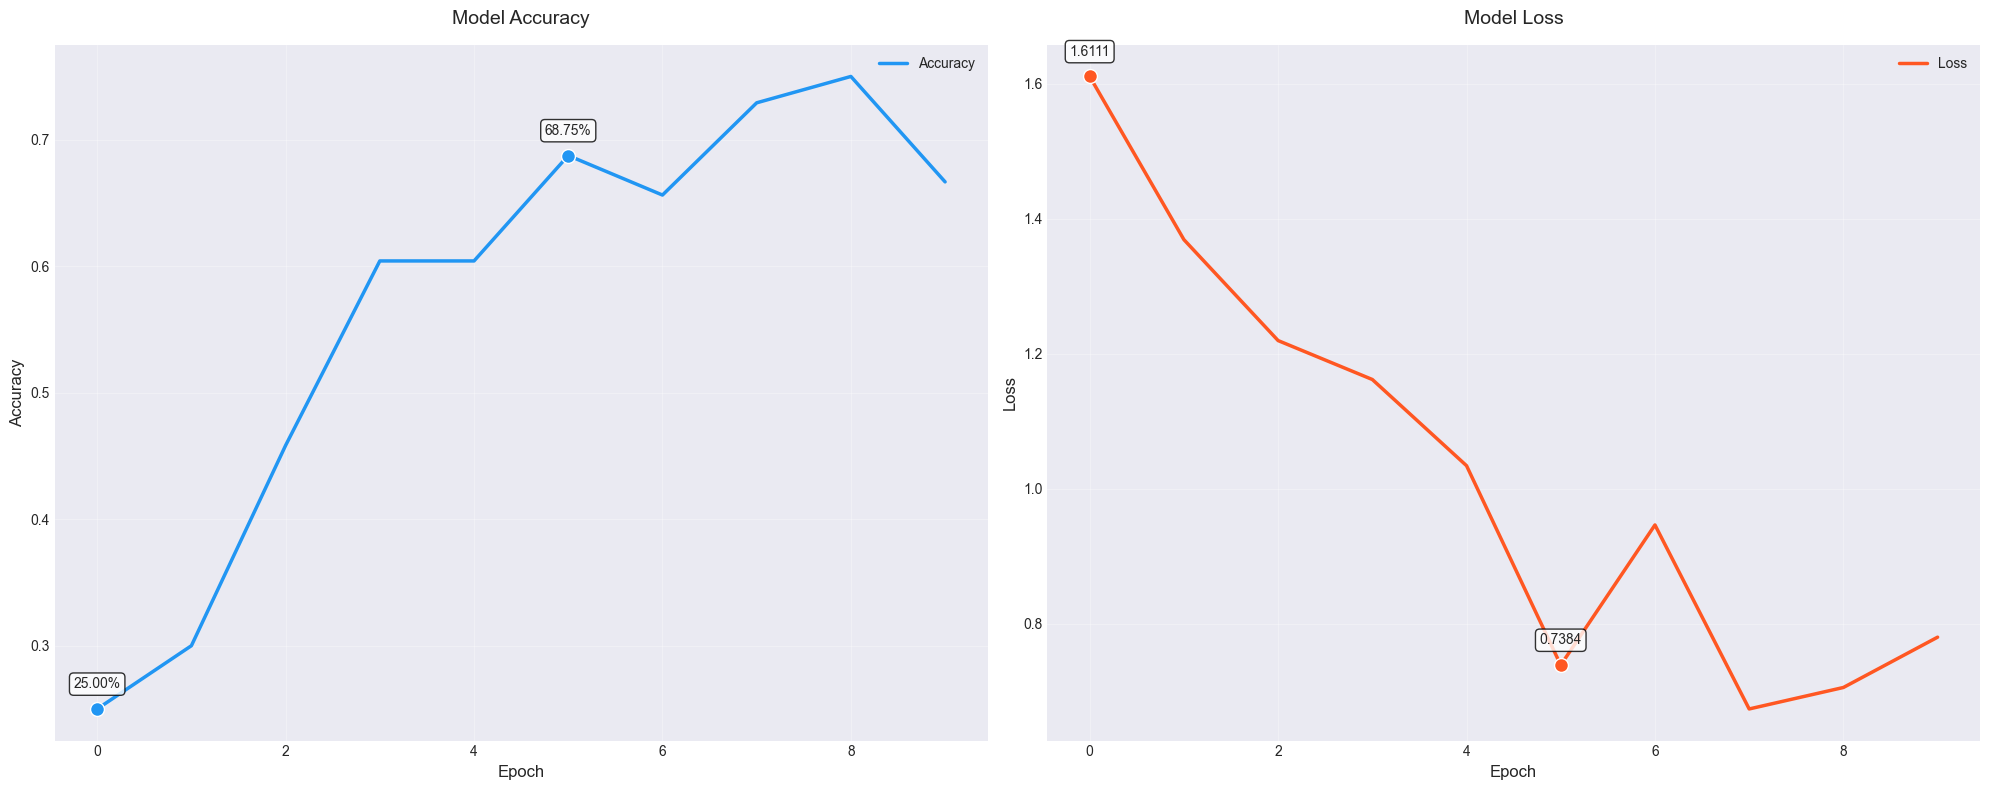


Model Accuracy Values per Epoch:
Epoch 0: 25.00%
Epoch 1: 30.00%
Epoch 2: 45.83%
Epoch 3: 60.42%
Epoch 4: 60.42%
Epoch 5: 68.75%
Epoch 6: 65.62%
Epoch 7: 72.92%
Epoch 8: 75.00%
Epoch 9: 66.67%

Model Accuracy Values for Every 5th Epoch (Annotated):
Epoch 0: 25.00%
Epoch 5: 68.75%


In [31]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Set the style to a modern theme
plt.style.use('seaborn-v0_8-darkgrid')

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8), dpi=100)

# Plot Accuracy
ax1.plot(history.history['accuracy'], linewidth=2.5, color='#2196F3', label='Accuracy')
ax1.scatter(range(0, epochs, 5), 
           [history.history['accuracy'][i] for i in range(0, epochs, 5)], 
           s=100, color='#2196F3', edgecolor='white', zorder=5)

# Add annotations for every 5th epoch
for i in range(0, epochs, 5):
    ax1.annotate(f'{history.history["accuracy"][i]*100:.2f}%', 
                xy=(i, history.history['accuracy'][i]),
                xytext=(0, 15), 
                textcoords='offset points',
                ha='center', 
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

ax1.set_title('Model Accuracy', fontsize=14, pad=15)
ax1.set_ylabel('Accuracy', fontsize=12)
ax1.set_xlabel('Epoch', fontsize=12)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot Loss
ax2.plot(history.history['loss'], linewidth=2.5, color='#FF5722', label='Loss')
ax2.scatter(range(0, epochs, 5), 
           [history.history['loss'][i] for i in range(0, epochs, 5)], 
           s=100, color='#FF5722', edgecolor='white', zorder=5)

# Add annotations for every 5th epoch
for i in range(0, epochs, 5):
    ax2.annotate(f'{history.history["loss"][i]:.4f}', 
                xy=(i, history.history['loss'][i]),
                xytext=(0, 15), 
                textcoords='offset points',
                ha='center', 
                fontsize=10,
                bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.8))

ax2.set_title('Model Loss', fontsize=14, pad=15)
ax2.set_ylabel('Loss', fontsize=12)
ax2.set_xlabel('Epoch', fontsize=12)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

# Print accuracy values for all epochs
print("\nModel Accuracy Values per Epoch:")
for i in range(epochs):
    print(f"Epoch {i}: {history.history['accuracy'][i]*100:.2f}%")

# Print accuracy values for every 5th epoch (as shown in annotations)
print("\nModel Accuracy Values for Every 5th Epoch (Annotated):")
for i in range(0, epochs, 5):
    print(f"Epoch {i}: {history.history['accuracy'][i]*100:.2f}%")